In [35]:
# Build PCA

In [36]:
# 为什么要降维？ 空间效率 计算效率 可视化

In [37]:
import numpy as np
np.random.seed(1)

In [38]:
#Step 1 创建两个数据集
mu_vec1=np.array([0,0,0]) #样本均值
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]]) #样本协方差

class1_sample=np.random.multivariate_normal(mu_vec1,cov_mat1,20).T
print(class1_sample)

mu_vec2=np.array([1,1,1]) #样本均值
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]]) #样本协方差

class2_sample=np.random.multivariate_normal(mu_vec2,cov_mat2,20).T
print(class2_sample)

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733]
 [-0.52817175 -2.3015387   0.3190391  -2.06014071  1.13376944 -0.87785842
  -1.10061918  0.50249434 -0.12289023  0.53035547 -0.6871727  -0.0126646
   1.65980218 -0.88762896  0.05080775  2.10025514  0.30017032 -0.34934272
   0.83898341  0.88514116]]
[[ 0.24560206  0.70190716  2.13162939 -0.39649634  1.16003707 -1.02220122
   1.23009474  0.79924193  1.19829972  1.37756379  2.19891788  0.36126959
   0.65614632  1.69803203  1.40349164  1.16938243  0.73378149  1.31515939
   1.35054598 -0.61577235]
 [ 2.

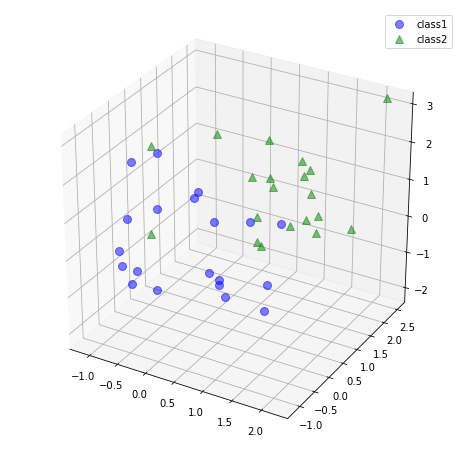

In [39]:
# Step2 可视化
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
# 字体
plt.rcParams['legend.fontsize']=10

ax.plot(class1_sample[0,:],class1_sample[1,:],class1_sample[2,:],
        'o',markersize=8,color='blue',alpha=0.5,label='class1')
ax.plot(class2_sample[0,:],class2_sample[1,:],class2_sample[2,:],
        '^',markersize=8,color='green',alpha=0.5,label='class2')

ax.legend(loc='upper right')
plt.show()

In [40]:
# Step 3 混合数据
all_samples=np.concatenate((class1_sample,class2_sample),axis=1)

In [41]:
all_samples

array([[ 1.62434536, -1.07296862,  1.74481176, -0.24937038, -0.3224172 ,
        -1.09989127,  0.04221375,  1.14472371,  0.90085595, -0.93576943,
        -0.69166075, -0.84520564, -1.11731035,  0.74204416, -0.74715829,
        -0.63699565,  0.12015895, -0.35224985, -0.20889423,  0.93110208,
         0.24560206,  0.70190716,  2.13162939, -0.39649634,  1.16003707,
        -1.02220122,  1.23009474,  0.79924193,  1.19829972,  1.37756379,
         2.19891788,  0.36126959,  0.65614632,  1.69803203,  1.40349164,
         1.16938243,  0.73378149,  1.31515939,  1.35054598, -0.61577235],
       [-0.61175641,  0.86540763, -0.7612069 ,  1.46210794, -0.38405435,
        -0.17242821,  0.58281521,  0.90159072, -0.68372786, -0.26788808,
        -0.39675353, -0.67124613,  0.2344157 , -0.19183555,  1.6924546 ,
         0.19091548,  0.61720311, -1.1425182 ,  0.58662319,  0.28558733,
         2.25286816,  1.48851815,  2.51981682, -0.44411381,  1.87616892,
         0.69379599,  1.76201118,  1.18656139,  1.

In [45]:
# Step 4 计算列（特征）均值


mean_vector=np.array([[np.mean(all_samples[i,:])] for i in range(all_samples.shape[0])])
print(mean_vector)

[[ 0.41667492]
 [ 0.69848315]
 [ 0.49242335]]


In [43]:
all_samples.shape

(3, 40)

In [46]:
# Step 5 计算协方差
cov_mat=np.zeros((3,3))

for i in range((all_samples.shape[1])):
    cov_mat+=(all_samples[:,i].reshape(3,1)-mean_vector).dot((all_samples[:,i].reshape(3,1)-mean_vector).T)
print(cov_mat)

[[ 38.4878051   10.50787213  11.13746016]
 [ 10.50787213  36.23651274  11.96598642]
 [ 11.13746016  11.96598642  49.73596619]]


In [47]:
# Step 6 计算特征向量与特征值
eig_val,eig_vec=np.linalg.eig(cov_mat)
print(eig_val)
print(eig_vec)


[ 65.16936779  32.69471296  26.59620328]
[[-0.49210223 -0.64670286  0.58276136]
 [-0.47927902 -0.35756937 -0.8015209 ]
 [-0.72672348  0.67373552  0.13399043]]


In [48]:
# Step 7
eig_pairs=[(np.abs(eig_val[i]),eig_vec[:,i]) for i in range(len(eig_val))]

eig_pairs.sort()
eig_pairs.reverse()

for i in eig_pairs:
    print(i[0])

65.1693677908
32.6947129632
26.5962032821


In [49]:
# Step 8 选择贡献率较大的前k个特征值
matrix_w=np.hstack((eig_pairs[0][1].reshape(3,1),eig_pairs[1][1].reshape(3,1)))
print(matrix_w)

[[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


In [50]:
# Step 9 利用所选择的特征对进行数据转换
transformed=matrix_w.T.dot(all_samples)
print(transformed)

[[-0.12230714  1.78582073 -0.72564846  0.91911067 -0.48120545  1.26186049
   0.49974121 -1.36060904 -0.02630959  0.20346559  1.02990798  0.74684543
  -0.76873682  0.37184198 -0.48040292 -1.30433953 -0.57308381  0.9748035
  -0.78806782 -1.23832629 -2.30009539 -1.73062935 -4.57170736  0.04785487
  -2.42616804 -1.15792646 -2.01497976 -1.98672036 -1.36534078 -2.76311357
  -2.1041081  -1.64296088 -1.09921946 -2.71718701 -1.38545546 -1.44331476
  -0.58485289 -1.63411201 -1.21353834 -1.73760916]
 [-1.18757151 -1.16617976 -0.64124251 -1.74952646  1.10969495  0.18151348
  -0.97722286 -0.72412904 -0.42090149  1.05827266  0.12619324  0.77808138
   1.75701561 -1.00931473 -0.08774954  1.75869787 -0.09616466  0.4009659
   0.49058694 -0.10791262  0.05492635 -0.3633537  -0.13330484  0.74907576
  -0.53466984  1.6445517  -0.90160187  0.00885182 -0.95318056  0.14270558
  -1.4249294  -0.01678979 -0.54147105  0.20291779 -1.54140242 -1.3474191
  -1.09515232 -1.41599875 -0.11407398  0.58889408]]


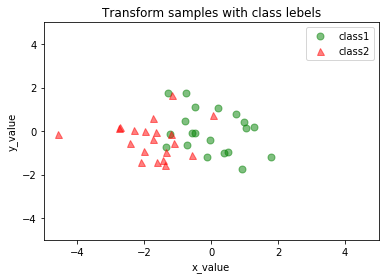

In [51]:
plt.plot(transformed[0,0:20],transformed[1,0:20],
         'o',markersize=7,color='green',alpha=0.5,label='class1')
plt.plot(transformed[0,20:40],transformed[1,20:40],
         '^',markersize=7,color='red',alpha=0.5,label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.legend()
plt.title('Transform samples with class lebels')
plt.show()

In [ ]:
# Compare PCA T-SNE LDA
# Best generic DR method (generally for unsupervised)
# PCA

# Best supervised data
# LDA(Linear discriminant analysis)

# Best visualization
# T-SNE
# Step 1 - compute similarity matrix between all feature vectors
# Step 2 - compute similarity matrix from map points
# Step 3 - use gradient descend to minimize distance between matrix